In [1]:
# Imports Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols


# Imports Multilinear Regression
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [9]:
# Load the Excel file(s) as tfl hires.
tfl_hires = pd.read_excel('London/Additional Data/tfl-daily-cycle-hires_clean.xlsx')

# View the DataFrame.
tfl_hires = tfl_hires.rename(columns={'Number of Bicycle Hires': 'Bicycle_Hires'})
tfl_hires

,Day,Bicycle_Hires
0,2010-07-30,6897
1,2010-07-31,5564
2,2010-08-01,4303
3,2010-08-02,6642
4,2010-08-03,7966
...,...,...
4806,2023-09-26,32815
4807,2023-09-27,32972
4808,2023-09-28,31853
4809,2023-09-29,29334


In [10]:
# Any missing values?
tfl_hires.isnull().sum()

Day              0
Bicycle_Hires    0
dtype: int64

In [11]:
# Explore the data.
tfl_hires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Day            4811 non-null   datetime64[ns]
 1   Bicycle_Hires  4811 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 75.3 KB


Text(0, 0.5, 'Count')

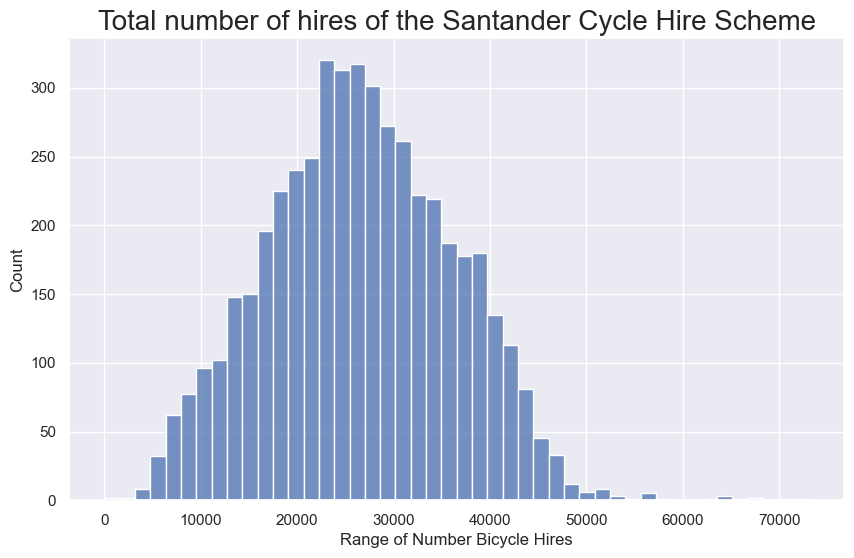

In [13]:
# Explore the data.
#Distribution of santander bike hires
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(tfl_hires['Bicycle_Hires'])
plt.title('Total number of hires of the Santander Cycle Hire Scheme', fontsize = 20)
plt.xlabel('Range of Number Bicycle Hires')
plt.ylabel('Count')

In [23]:
# Create a CSV file as output.
tfl_hires.to_csv('tfl_hires_clean.csv', index=False)

In [27]:
df_tfl_hires = pd.read_csv('tfl_hires_clean.csv', parse_dates=['Day'], index_col='Day')


In [28]:
df_tfl_hires

,Bicycle_Hires
Day,
2010-07-30,6897
2010-07-31,5564
2010-08-01,4303
2010-08-02,6642
2010-08-03,7966
...,...
2023-09-26,32815
2023-09-27,32972
2023-09-28,31853


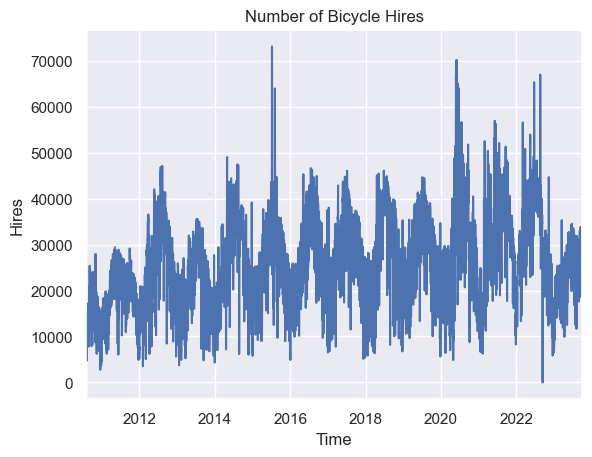

In [45]:
#Data Visualization:

df_tfl_hires['Bicycle_Hires'].plot()
plt.xlabel('Time')
plt.ylabel('Hires')
plt.title('Number of Bicycle Hires')
plt.show()

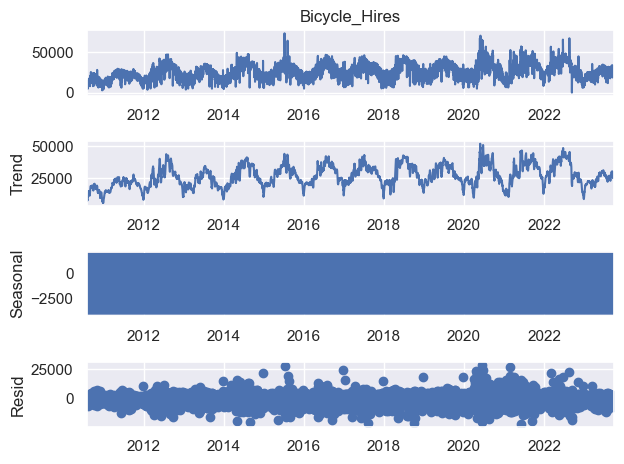

In [34]:
#Decompose your time series data into its components, including trend, seasonality, and noise. The statsmodels library provides tools for this purpose.

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_tfl_hires['Bicycle_Hires'], model='additive')
result.plot()
plt.show()

In [35]:
#Apply moving averages and other smoothing techniques to remove noise and highlight underlying trends in your time series data.

df_tfl_hires['smoothed'] = df_tfl_hires['Bicycle_Hires'].rolling(window=7).mean()


In [36]:
df_tfl_hires

,Bicycle_Hires,smoothed
Day,,
2010-07-30,6897,NaN
2010-07-31,5564,NaN
2010-08-01,4303,NaN
2010-08-02,6642,NaN
2010-08-03,7966,NaN
...,...,...
2023-09-26,32815,26172.857143
2023-09-27,32972,27983.142857
2023-09-28,31853,28883.714286


In [39]:
df_tfl_hires.isnull().sum()

Bicycle_Hires    0
smoothed         6
dtype: int64

In [40]:
df_tfl_hires = df_tfl_hires.dropna()
df_tfl_hires

,Bicycle_Hires,smoothed
Day,,
2010-08-05,8724,6855.571429
2010-08-06,9797,7269.857143
2010-08-07,6631,7422.285714
2010-08-08,7864,7931.000000
2010-08-09,6191,7866.571429
...,...,...
2023-09-26,32815,26172.857143
2023-09-27,32972,27983.142857
2023-09-28,31853,28883.714286


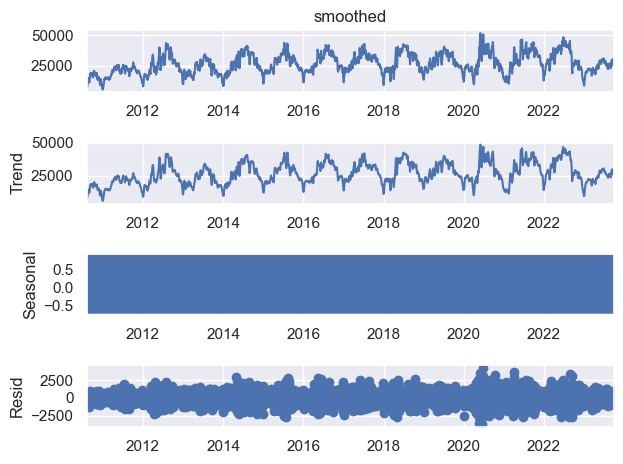

In [41]:
result_smooth = seasonal_decompose(df_tfl_hires['smoothed'], model='additive')
result_smooth.plot()
plt.show()

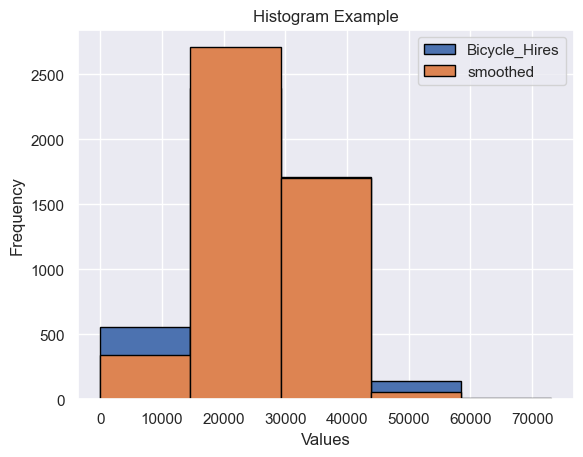

In [43]:
# Plot a histogram
df_tfl_hires.plot.hist(bins=5, edgecolor='black')  # You can specify the number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()

In [46]:
# Group and aggregate by year
yearly_aggregated = df_tfl_hires.resample('Y').sum()  # You can use other aggregation functions like 'mean', 'max', etc.

print(yearly_aggregated)

            Bicycle_Hires      smoothed
Day                                    
2010-12-31        2141548  2.143123e+06
2011-12-31        7142449  7.137044e+06
2012-12-31        9519283  9.514473e+06
2013-12-31        8045459  8.048200e+06
2014-12-31       10023897  1.001613e+07
2015-12-31        9871839  9.866200e+06
2016-12-31       10303637  1.030704e+07
2017-12-31       10446044  1.045470e+07
2018-12-31       10567540  1.055378e+07
2019-12-31       10424955  1.042785e+07
2020-12-31       10434167  1.042723e+07
2021-12-31       10941264  1.093597e+07
2022-12-31       11505872  1.153144e+07
2023-12-31        6602257  6.537627e+06


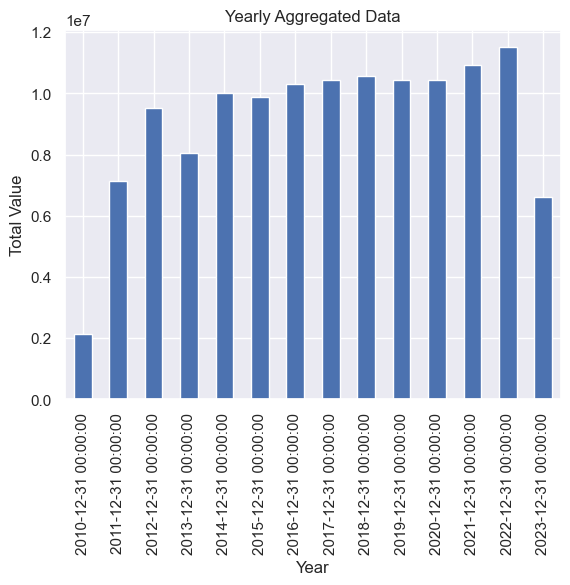

In [59]:
# Plot the aggregated data as a bar chart
yearly_aggregated['Bicycle_Hires'].plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Yearly Aggregated Data')
plt.show()

TFL Usage Data

In [60]:
# Load the Excel file(s) as tfl usage.
tfl_usage = pd.read_excel('London/Additional Data/tfl-monthly-cycle-usage.xlsx')

# View the DataFrame.
tfl_usage

,Month,Average Hire Time (mins)
0,2010-07-01,17.232566
1,2010-08-01,16.551880
2,2010-09-01,15.219079
3,2010-10-01,15.204481
4,2010-11-01,13.776083
...,...,...
154,2023-05-01,20.000000
155,2023-06-01,20.000000
156,2023-07-01,20.000000
157,2023-08-01,21.000000


In [61]:
tfl_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     159 non-null    datetime64[ns]
 1   Average Hire Time (mins)  159 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [62]:
tfl_usage = tfl_usage.set_index('Month')

In [63]:
tfl_usage

,Average Hire Time (mins)
Month,
2010-07-01,17.232566
2010-08-01,16.551880
2010-09-01,15.219079
2010-10-01,15.204481
2010-11-01,13.776083
...,...
2023-05-01,20.000000
2023-06-01,20.000000
2023-07-01,20.000000


In [64]:
tfl_usage.isnull().sum()

Average Hire Time (mins)    0
dtype: int64

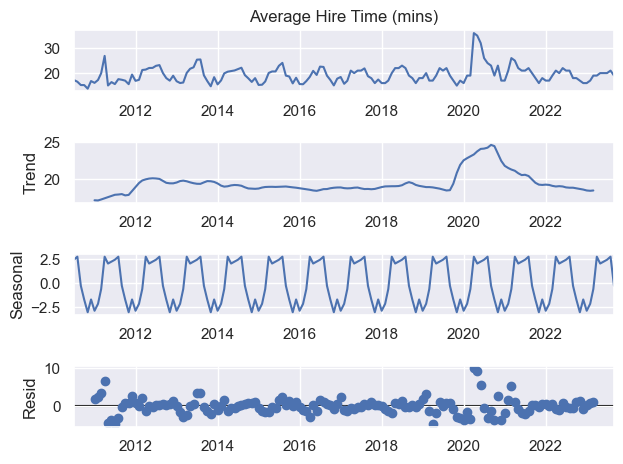

In [65]:
tfl_usage_seasonal = seasonal_decompose(tfl_usage['Average Hire Time (mins)'], model='additive')
tfl_usage_seasonal.plot()
plt.show()

In [83]:
# Load the Excel file(s) as tfl hires.
tfl_journey = pd.read_excel('London/Additional Data/Percentage Journeys Database_clean.xlsx')

# View the DataFrame.
tfl_journey

,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,2010-04-01,2010-05-01,189.114661,90.545391,6.291000,2.287785,NaN,NaN,NaN
1,2010-05-02,2010-05-29,181.604792,84.517504,5.813000,2.154791,NaN,NaN,NaN
2,2010-05-30,2010-06-26,175.883173,84.286014,5.752000,2.129122,NaN,NaN,NaN
3,2010-06-27,2010-07-24,183.428052,86.479612,6.064480,2.141941,NaN,NaN,NaN
4,2010-07-25,2010-08-21,160.422767,82.895287,5.767624,2.008482,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
170,2023-04-30,2023-05-27,145.997888,88.209001,7.720572,1.644552,14.071664,0.124556,15.054180
171,2023-05-28,2023-06-24,145.783189,90.225402,7.867697,1.676165,14.586341,0.135932,15.956175
172,2023-06-25,2023-07-22,147.120034,94.114008,7.894126,1.630184,14.339887,0.126068,16.656250
173,2023-07-23,2023-08-19,129.710544,86.647955,7.213507,1.425394,12.375553,0.177132,15.359475


In [84]:
tfl_journey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Period beginning               175 non-null    datetime64[ns]
 1   Period ending                  175 non-null    datetime64[ns]
 2   Bus journeys (m)               175 non-null    float64       
 3   Underground journeys (m)       175 non-null    float64       
 4   DLR Journeys (m)               175 non-null    float64       
 5   Tram Journeys (m)              175 non-null    float64       
 6   Overground Journeys (m)        168 non-null    float64       
 7   London Cable Car Journeys (m)  146 non-null    float64       
 8   TfL Rail Journeys (m)          109 non-null    float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 12.4 KB


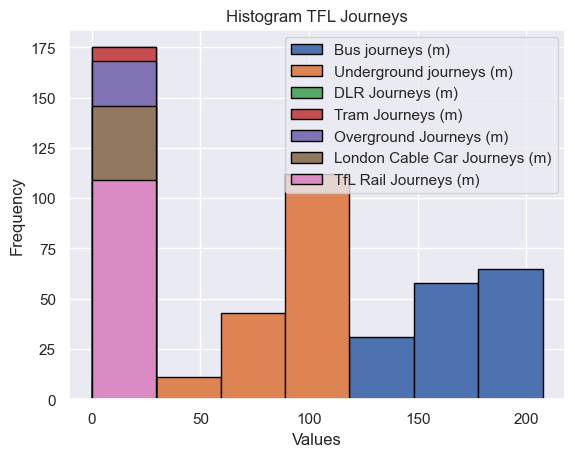

In [87]:
# Plot a histogram
tfl_journey.plot.hist(bins=7, edgecolor='black')  # You can specify the number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram TFL Journeys')
plt.show()

In [88]:
tfl_journey = tfl_journey.set_index('Period beginning')

In [92]:
tfl_journey = tfl_journey.drop('Period ending', axis=1)

In [93]:
tfl_journey

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
Period beginning,,,,,,,
2010-04-01,189.114661,90.545391,6.291000,2.287785,NaN,NaN,NaN
2010-05-02,181.604792,84.517504,5.813000,2.154791,NaN,NaN,NaN
2010-05-30,175.883173,84.286014,5.752000,2.129122,NaN,NaN,NaN
2010-06-27,183.428052,86.479612,6.064480,2.141941,NaN,NaN,NaN
2010-07-25,160.422767,82.895287,5.767624,2.008482,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-04-30,145.997888,88.209001,7.720572,1.644552,14.071664,0.124556,15.054180
2023-05-28,145.783189,90.225402,7.867697,1.676165,14.586341,0.135932,15.956175
2023-06-25,147.120034,94.114008,7.894126,1.630184,14.339887,0.126068,16.656250


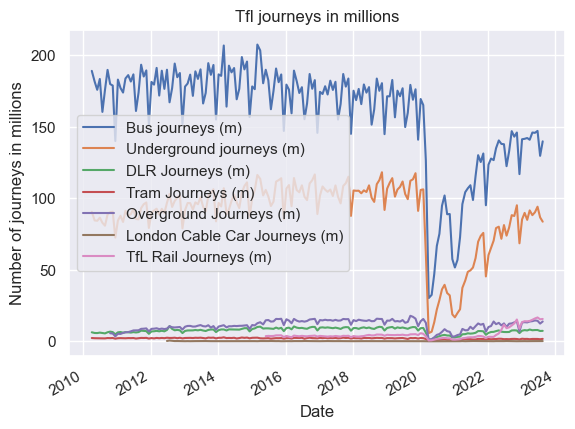

In [100]:
tfl_journey.plot()
plt.xlabel('Date')
plt.ylabel('Number of journeys in millions')
plt.title('Tfl journeys in millions')
plt.show()

In [101]:
# Load the CSV file(s) as Inner London.
inner_ldn = pd.read_csv('Cleaned Data/cleaned_inner_london.csv')

# View the DataFrame.
inner_ldn.head()

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1
1,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0615 - 0630,Early Morning,Northbound,06:15,2,0,2
2,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0630 - 0645,Early Morning,Northbound,06:30,2,0,2
3,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0645 - 0700,Early Morning,Northbound,06:45,4,0,4
4,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0700 - 0715,AM peak,Northbound,07:00,4,0,4


In [104]:
inner_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523776 entries, 0 to 523775
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Survey wave (year)          523776 non-null  int64 
 1   Site ID                     523776 non-null  object
 2   Location                    523776 non-null  object
 3   Survey_weekday              523776 non-null  object
 4   Survey_date                 523776 non-null  object
 5   Weather                     523776 non-null  object
 6   Time                        523776 non-null  object
 7   Period                      523776 non-null  object
 8   Direction                   523776 non-null  object
 9   Start time                  523776 non-null  object
 10  Number of private cycles    523776 non-null  int64 
 11  Number of cycle hire bikes  523776 non-null  int64 
 12  Total cycles                523776 non-null  int64 
dtypes: int64(4), object(9)
memory

In [105]:
inner_ldn.describe()

,Survey wave (year),Number of private cycles,Number of cycle hire bikes,Total cycles
count,523776.000000,523776.000000,523776.000000,523776.000000
mean,2017.986070,5.929833,0.267943,6.196408
std,2.035381,10.937833,0.944529,11.309639
min,2015.000000,0.000000,0.000000,0.000000
25%,2016.000000,1.000000,0.000000,1.000000
50%,2018.000000,3.000000,0.000000,3.000000
75%,2020.000000,7.000000,0.000000,7.000000
max,2021.000000,278.000000,29.000000,280.000000


In [106]:
inner_ldn.isnull().sum()

Survey wave (year)            0
Site ID                       0
Location                      0
Survey_weekday                0
Survey_date                   0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start time                    0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64

In [120]:
inner_ldn = inner_ldn.rename(columns={'Survey wave (year)': 'Year'})

In [144]:
inner_ldn['Survey_date'] = pd.to_datetime(inner_ldn['Survey_date'], format='%d/%m/%y',errors='coerce')

In [145]:
inner_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523776 entries, 0 to 523775
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Year                        523776 non-null  int64         
 1   Site ID                     523776 non-null  object        
 2   Location                    523776 non-null  object        
 3   Survey_weekday              523776 non-null  object        
 4   Survey_date                 521024 non-null  datetime64[ns]
 5   Weather                     523776 non-null  object        
 6   Time                        523776 non-null  object        
 7   Period                      523776 non-null  object        
 8   Direction                   523776 non-null  object        
 9   Start time                  523776 non-null  object        
 10  Number of private cycles    523776 non-null  int64         
 11  Number of cycle hire bikes  523776 non-

In [122]:
aggregated_inner_ldn = inner_ldn.groupby('Year').sum()

In [123]:
aggregated_inner_ldn

,Number of private cycles,Number of cycle hire bikes,Total cycles
Year,,,
2015,434028,15927,449955
2016,424063,17599,441662
2017,432125,18274,450399
2018,437667,20785,458452
2019,424870,23963,448595
2020,408488,20930,428940
2021,544663,22864,567527


In [124]:
# Load the CSV file(s) as Outer London.
outer_ldn = pd.read_csv('Cleaned Data/cleaned_outer_london.csv')

# View the DataFrame.
outer_ldn.head()

,Survey wave (year),Site ID,Location,Weather,Time,Period,Direction,Start time,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,1,0,3
1,2015,OUTCY001,High Road Leyton,Dry,0615 - 0630,Early Morning,Northbound,06:15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,Dry,0630 - 0645,Early Morning,Northbound,06:30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,Dry,0645 - 0700,Early Morning,Northbound,06:45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,Dry,0700 - 0715,AM peak,Northbound,07:00,4,1,0,5


In [126]:
outer_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Weather                   375660 non-null  object
 4   Time                      375660 non-null  object
 5   Period                    375660 non-null  object
 6   Direction                 375660 non-null  object
 7   Start time                375660 non-null  object
 8   Number of male cycles     375660 non-null  int64 
 9   Number of female cycles   375660 non-null  int64 
 10  Number of unknown cycles  375660 non-null  int64 
 11  Total cycles              375660 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 34.4+ MB


In [125]:
# Load the CSV file(s) as Central London.
central_ldn = pd.read_csv('Cleaned Data/cleaned_central_london.csv')

# View the DataFrame.
central_ldn.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0600 - 0615,Early Morning,Northbound,06:00,0,0,0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0615 - 0630,Early Morning,Northbound,06:15,15,0,15
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0630 - 0645,Early Morning,Northbound,06:30,35,0,35
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0645 - 0700,Early Morning,Northbound,06:45,59,2,61
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0700 - 0715,AM peak,Northbound,07:00,73,0,73


In [130]:
central_ldn['Survey_date'] = central_ldn['Survey_date'].astype(str)


In [140]:
central_ldn['Survey_date'] = pd.to_datetime(central_ldn['Survey_date'], format='%d/%m/%y',errors='coerce')


In [141]:
central_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758163 entries, 0 to 758162
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  758163 non-null  object        
 1   Equivalent financial quarter    758163 non-null  object        
 2   Site ID                         758163 non-null  object        
 3   Location                        758163 non-null  object        
 4   Survey_date                     747751 non-null  datetime64[ns]
 5   Survey_weekday                  758163 non-null  object        
 6   Weather                         758163 non-null  object        
 7   Time                            758163 non-null  object        
 8   Period                          758163 non-null  object        
 9   Direction                       758163 non-null  object        
 10  Start time                      758163 non-null  object 

In [185]:
selected_columns = ['Site ID','Survey_date','Number of private cycles','Number of cycle hire bikes','Total cycles']
central_ldn_2 = central_ldn[selected_columns]

In [186]:
central_ldn_2

,Site ID,Survey_date,Number of private cycles,Number of cycle hire bikes,Total cycles
0,CENCY001,2014-01-24,0,0,0
1,CENCY001,2014-01-24,15,0,15
2,CENCY001,2014-01-24,35,0,35
3,CENCY001,2014-01-24,59,2,61
4,CENCY001,2014-01-24,73,0,73
...,...,...,...,...,...
758158,CENCY702,2021-12-21,22,1,23
758159,CENCY702,2021-12-21,20,0,20
758160,CENCY702,2021-12-21,16,1,17
758161,CENCY702,2021-12-21,10,1,11


In [187]:
# Load the CSV file(s) as Bike Sites.
bike_sites = pd.read_csv('Cleaned Data/cleaned_bike_sites.csv')

# View the DataFrame.
bike_sites.head()

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central


In [188]:
bike_sites = bike_sites.rename(columns={'UnqID': 'Site ID'})

In [189]:
selected_columns = ['Site ID','Location','Borough','Functional cycling area']
bike_sites_2 = bike_sites[selected_columns]

In [190]:
central_ldn_3 = pd.merge(central_ldn_2, bike_sites_2, on='Site ID', how='left')

In [191]:
central_ldn_3

,Site ID,Survey_date,Number of private cycles,Number of cycle hire bikes,Total cycles,Location,Borough,Functional cycling area
0,CENCY001,2014-01-24,0,0,0,Millbank (south of Thorney Street),Westminster,Central
1,CENCY001,2014-01-24,15,0,15,Millbank (south of Thorney Street),Westminster,Central
2,CENCY001,2014-01-24,35,0,35,Millbank (south of Thorney Street),Westminster,Central
3,CENCY001,2014-01-24,59,2,61,Millbank (south of Thorney Street),Westminster,Central
4,CENCY001,2014-01-24,73,0,73,Millbank (south of Thorney Street),Westminster,Central
...,...,...,...,...,...,...,...,...
758158,CENCY702,2021-12-21,22,1,23,Haymarket,Westminster,Central
758159,CENCY702,2021-12-21,20,0,20,Haymarket,Westminster,Central
758160,CENCY702,2021-12-21,16,1,17,Haymarket,Westminster,Central
758161,CENCY702,2021-12-21,10,1,11,Haymarket,Westminster,Central


In [192]:
grouped_df = central_ldn_3.groupby(['Survey_date', 'Location', 'Borough']).sum().reset_index()



In [193]:
grouped_df

,Survey_date,Location,Borough,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014-01-20,Cannon Street,City of London,962,122,1084
1,2014-01-20,Eastcheap,City of London,882,153,1035
2,2014-01-20,Farringdon Street,City of London,2948,249,3197
3,2014-01-20,Fleet Street,City of London,1131,149,1280
4,2014-01-20,Gracechurch Street,City of London,2652,167,2819
...,...,...,...,...,...,...
17318,2021-12-21,Haymarket,Westminster,281,29,310
17319,2021-12-22,Horse Guards Avenue,Westminster,199,48,247
17320,2021-12-23,Trinity Street (east),Southwark,124,13,137
17321,2021-12-24,Trinity Street (east),Southwark,187,28,215


In [194]:
grouped_df.set_index('Survey_date', inplace=True)


In [196]:
grouped_df

,Location,Borough,Number of private cycles,Number of cycle hire bikes,Total cycles
Survey_date,,,,,
2014-01-20,Cannon Street,City of London,962,122,1084
2014-01-20,Eastcheap,City of London,882,153,1035
2014-01-20,Farringdon Street,City of London,2948,249,3197
2014-01-20,Fleet Street,City of London,1131,149,1280
2014-01-20,Gracechurch Street,City of London,2652,167,2819
...,...,...,...,...,...
2021-12-21,Haymarket,Westminster,281,29,310
2021-12-22,Horse Guards Avenue,Westminster,199,48,247
2021-12-23,Trinity Street (east),Southwark,124,13,137


In [198]:
# Define the dependent variable.
y = grouped_df['Total cycles'] 

# Define the independent variable.
x = grouped_df['Number of cycle hire bikes'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = grouped_df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 4.942e+04
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:17:47   Log-Likelihood:            -1.3003e+05
No. Observations:               17323   AIC:                         2.601e+05
Df Residuals:                   17321   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.7528      4.282     29.131      0.000     116.359     133.147
x              7.5284      0.034    222.308      0.000       7.462       7.595
==============================================================================
Omnibus:                     6784.923   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97493.965
Skew:                           1.487   Prob(JB):                         0.00
Kurtosis:                      14.235   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    124.752830
x              7.528441
dtype: float64
Standard errors:  Intercept    4.282418
x            0.033865
dtype: float64
Predicted values:  [1043.22263527 1276.60430714 1999.33464582 ...  222.62256323  335.54917865
  418.36202995]


In [200]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the coefficient to 33.061693 and the constant to -75.052663.
y_pred = 124.7528 + 7.5284	 * grouped_df['Number of cycle hire bikes'] 

# View the output.
y_pred

Survey_date
2014-01-20    1043.2176
2014-01-20    1276.5980
2014-01-20    1999.3244
2014-01-20    1246.4844
2014-01-20    1381.9956
                ...    
2021-12-21     343.0764
2021-12-22     486.1160
2021-12-23     222.6220
2021-12-24     335.5480
2021-12-30     418.3604
Name: Number of cycle hire bikes, Length: 17323, dtype: float64

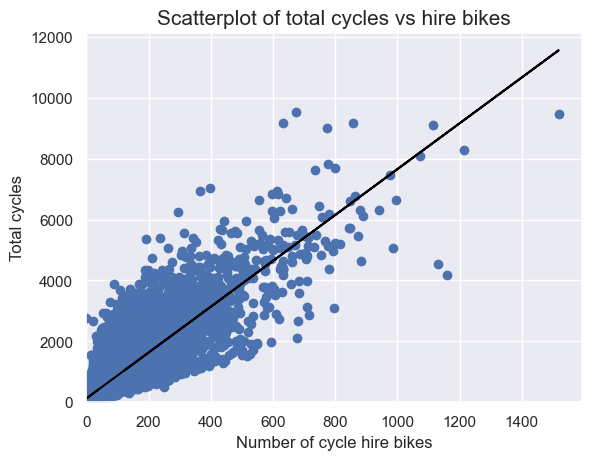

In [202]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('Scatterplot of total cycles vs hire bikes', fontsize = 15)
plt.xlabel('Number of cycle hire bikes')
plt.ylabel('Total cycles')

# View the plot.
plt.show()

In [203]:
grouped_df

,Location,Borough,Number of private cycles,Number of cycle hire bikes,Total cycles
Survey_date,,,,,
2014-01-20,Cannon Street,City of London,962,122,1084
2014-01-20,Eastcheap,City of London,882,153,1035
2014-01-20,Farringdon Street,City of London,2948,249,3197
2014-01-20,Fleet Street,City of London,1131,149,1280
2014-01-20,Gracechurch Street,City of London,2652,167,2819
...,...,...,...,...,...
2021-12-21,Haymarket,Westminster,281,29,310
2021-12-22,Horse Guards Avenue,Westminster,199,48,247
2021-12-23,Trinity Street (east),Southwark,124,13,137


In [208]:
bike_ratio = grouped_df.drop('Total cycles', axis=1)

In [209]:
bike_ratio = bike_ratio.drop('Location', axis=1)

In [210]:
bike_ratio

,Borough,Number of private cycles,Number of cycle hire bikes
Survey_date,,,
2014-01-20,City of London,962,122
2014-01-20,City of London,882,153
2014-01-20,City of London,2948,249
2014-01-20,City of London,1131,149
2014-01-20,City of London,2652,167
...,...,...,...
2021-12-21,Westminster,281,29
2021-12-22,Westminster,199,48
2021-12-23,Southwark,124,13


In [215]:
bike_ratio_borough = bike_ratio.groupby('Borough').sum().reset_index()

In [216]:
bike_ratio_borough

,Borough,Number of private cycles,Number of cycle hire bikes
0,Camden,1756691,208231
1,City of London,2696059,339826
2,Hackney,32367,4143
3,Islington,906033,90394
4,Lambeth,1100727,144500
5,Southwark,1688510,145260
6,Tower Hamlets,22723,3741
7,Westminster,2890934,432218


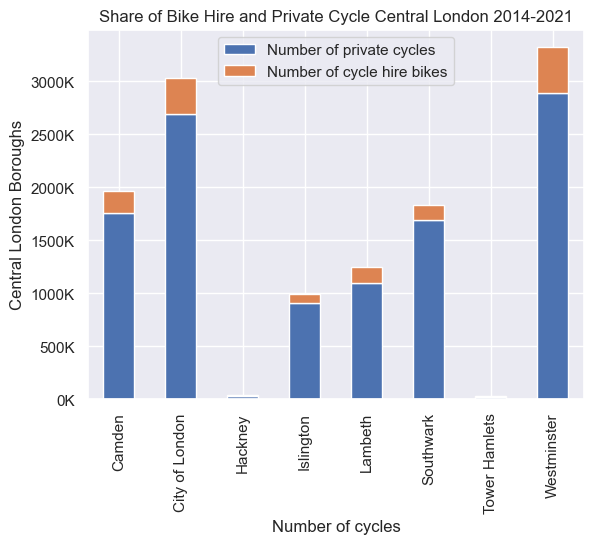

In [254]:
# Plotting a grouped bar chart
bike_ratio_borough.plot(x='Borough', kind='bar', stacked=True)
plt.xlabel('Number of cycles')
plt.ylabel('Central London Boroughs')
plt.title('Share of Bike Hire and Private Cycle Central London 2014-2021')
# Formatting the Y-axis scale (for example, setting it to logarithmic scale)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

In [232]:
inner_ldn_new = pd.merge(inner_ldn, bike_sites_2, on='Site ID', how='left')

In [233]:
inner_ldn_new

,Year,Site ID,Location_x,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,Location_y,Borough,Functional cycling area
0,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1,Grove Road,Tower Hamlets,Inner
1,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0615 - 0630,Early Morning,Northbound,06:15,2,0,2,Grove Road,Tower Hamlets,Inner
2,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0630 - 0645,Early Morning,Northbound,06:30,2,0,2,Grove Road,Tower Hamlets,Inner
3,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0645 - 0700,Early Morning,Northbound,06:45,4,0,4,Grove Road,Tower Hamlets,Inner
4,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0700 - 0715,AM peak,Northbound,07:00,4,0,4,Grove Road,Tower Hamlets,Inner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523771,2021,INNCY597,Augustus Road,Wednesday,2021-05-26,Dry,2045 - 2100,Evening,Westbound,20:45,3,0,3,Augustus Road,Wandsworth,Inner
523772,2021,INNCY597,Augustus Road,Wednesday,2021-05-26,Dry,2100 - 2115,Evening,Westbound,21:00,2,0,2,Augustus Road,Wandsworth,Inner
523773,2021,INNCY597,Augustus Road,Wednesday,2021-05-26,Dry,2115 - 2130,Evening,Westbound,21:15,2,0,2,Augustus Road,Wandsworth,Inner
523774,2021,INNCY597,Augustus Road,Wednesday,2021-05-26,Dry,2130 - 2145,Evening,Westbound,21:30,2,0,2,Augustus Road,Wandsworth,Inner


In [235]:
filter_inner = ['Borough','Number of private cycles','Number of cycle hire bikes']
inner_ldn_filtered = inner_ldn_new[filter_inner]

In [236]:
inner_ldn_filtered

,Borough,Number of private cycles,Number of cycle hire bikes
0,Tower Hamlets,1,0
1,Tower Hamlets,2,0
2,Tower Hamlets,2,0
3,Tower Hamlets,4,0
4,Tower Hamlets,4,0
...,...,...,...
523771,Wandsworth,3,0
523772,Wandsworth,2,0
523773,Wandsworth,2,0
523774,Wandsworth,2,0


In [237]:
bike_ratio_borough_inner = inner_ldn_filtered.groupby('Borough').sum().reset_index()

In [238]:
bike_ratio_borough_inner

,Borough,Number of private cycles,Number of cycle hire bikes
0,Brent,7913,87
1,Bromley,1301,3
2,Camden,170769,2978
3,Ealing,19325,70
4,Greenwich,562,2
5,Hackney,378218,4953
6,Hammersmith & Fulham,302193,17388
7,Haringey,30779,71
8,Hounslow,1496,40
9,Islington,389335,5073


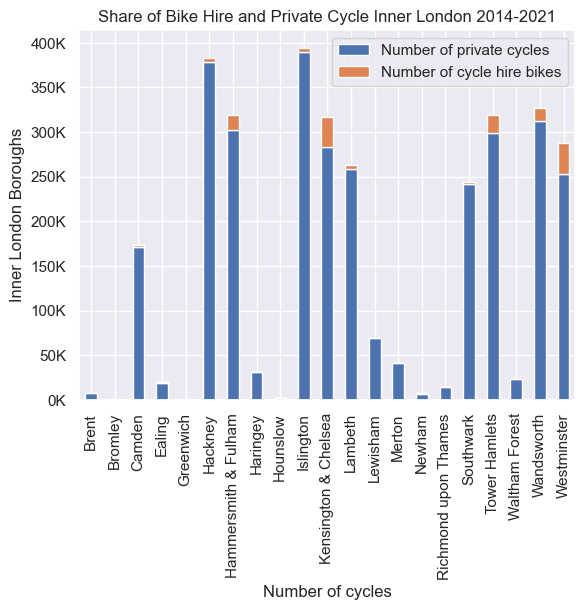

In [252]:
# Plotting a grouped bar chart
bike_ratio_borough_inner.plot(x='Borough', kind='bar', stacked=True)
plt.xlabel('Number of cycles')
plt.ylabel('Inner London Boroughs')
plt.title('Share of Bike Hire and Private Cycle Inner London 2014-2021')
# Formatting the Y-axis scale (for example, setting it to logarithmic scale)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

In [255]:
tfl_hires

,Day,Bicycle_Hires
0,2010-07-30,6897
1,2010-07-31,5564
2,2010-08-01,4303
3,2010-08-02,6642
4,2010-08-03,7966
...,...,...
4806,2023-09-26,32815
4807,2023-09-27,32972
4808,2023-09-28,31853
4809,2023-09-29,29334


In [256]:
tfl_hires_year = tfl_hires

# Create a new column for the year extracted from the datetime column
tfl_hires_year['year'] = tfl_hires_year['Day'].dt.year

# Group by the newly created 'year' column and calculate the sum
tfl_hires_year_grouped = tfl_hires_year.groupby('year').sum()

In [257]:
tfl_hires_year_grouped

,Bicycle_Hires
year,
2010,2180813
2011,7142449
2012,9519283
2013,8045459
2014,10023897
2015,9871839
2016,10303637
2017,10446044
2018,10567540


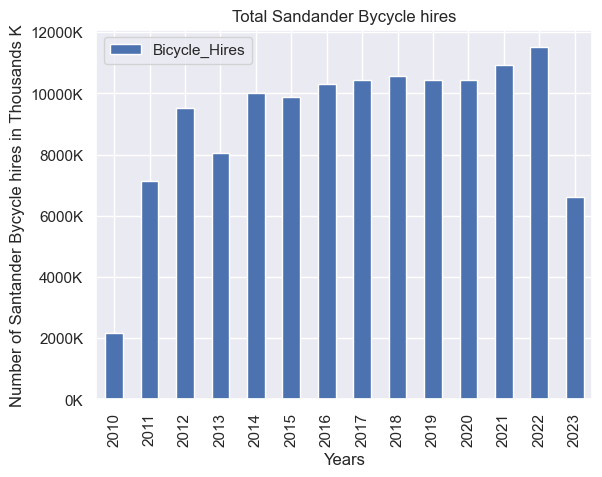

In [260]:
# Plotting a grouped bar chart
tfl_hires_year_grouped.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of Santander Bycycle hires in Thousands K')
plt.title('Total Sandander Bycycle hires')
# Formatting the Y-axis scale (for example, setting it to logarithmic scale)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()